## Download dataset
1.MNIST <br>
2.Fashion MNIST <br>
3.CIFAR 10 <br>
4.CIFAR 100 <br>
5.IRIS

In [1]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
from keras.datasets import cifar100
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

Using TensorFlow backend.


# MNIST

## Build Neural Network to get CV accuracy (~100%)

In [2]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# Compile model using above optimizer

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 8s 125us/step - loss: 0.2489 - acc: 0.9257 - val_loss: 0.1308 - val_acc: 0.9590
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1029 - acc: 0.9692 - val_loss: 0.0886 - val_acc: 0.9734
Epoch 3/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0665 - acc: 0.9798 - val_loss: 0.0796 - val_acc: 0.9735
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0468 - acc: 0.9856 - val_loss: 0.0654 - val_acc: 0.9800
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0332 - acc: 0.9905 - val_loss: 0.0631 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0245 -

## Plot history :- epochs vs loss  on training, test data epochs vs accuracy

In [3]:
#Training
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1664/60000 [..............................] - ETA: 6s - loss: 0.0068 - acc: 0.9976

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 7s 115us/step - loss: 0.0043 - acc: 0.9992 - val_loss: 0.0646 - val_acc: 0.9828
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0028 - acc: 0.9997 - val_loss: 0.0646 - val_acc: 0.9839
Epoch 3/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0674 - val_acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.0672 - val_acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.0679 - val_acc: 0.9848
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0743 - val_acc: 0.9838
Epoch 7/10
60000/60000 [==============================] - 7s 114us/step - loss: 9.5198e-04 - acc: 0.9999 - val_loss: 0.0694 - val_acc: 0.9840
Epoch 8/10
60000/60000 [=================

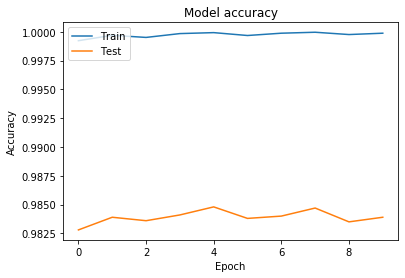

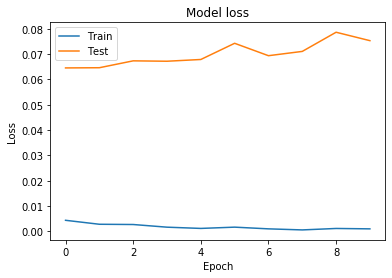

In [4]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Obtain model summary

In [5]:
#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


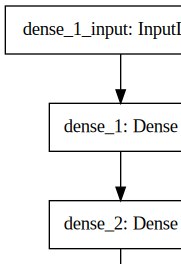

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Use data augmentation

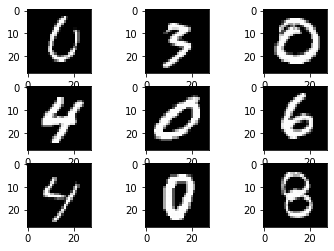

In [7]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [8]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

#Model building
initializer = keras.initializers.Identity(gain=1.0)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

ValueError: ignored

# Fashion MNIST

In [11]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# Compile model using above optimizer

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.2310 - acc: 0.9320 - val_loss: 0.1208 - val_acc: 0.9635
Epoch 2/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0968 - acc: 0.9711 - val_loss: 0.0864 - val_acc: 0.9741
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0623 - acc: 0.9815 - val_loss: 0.0815 - val_acc: 0.9756
Epoch 4/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0441 - acc: 0.9870 - val_loss: 0.0680 - val_acc: 0.9781
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0320 - acc: 0.9906 - val_loss: 0.0615 - val_acc: 0.9812
Epoch 6/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0239 - acc: 0.9933 - val_loss: 0.0655 - val_acc: 0.9802
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0168 - acc: 0.9950 - val_loss: 0.0576 - 

In [12]:
#Training
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1664/60000 [..............................] - ETA: 6s - loss: 0.0049 - acc: 0.9988

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 7s 118us/step - loss: 0.0047 - acc: 0.9990 - val_loss: 0.0683 - val_acc: 0.9822
Epoch 2/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0614 - val_acc: 0.9840
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0019 - acc: 0.9998 - val_loss: 0.0657 - val_acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0666 - val_acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.0739 - val_acc: 0.9818
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0713 - val_acc: 0.9831
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 5.8823e-04 - acc: 1.0000 - val_loss: 0.0710 - val_acc: 0.9830
Epoch 8/10
60000/60000 [=================

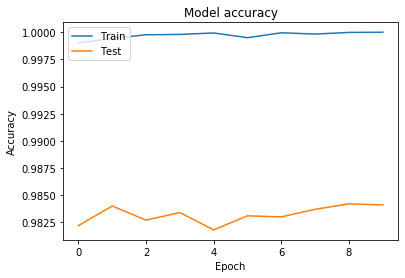

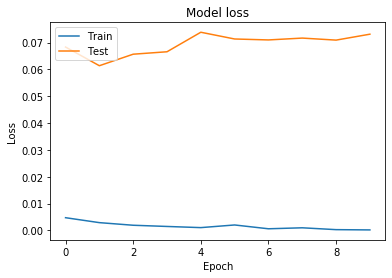

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
#Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images1')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images1', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

FileExistsError: ignored

# CIFAR 10

In [0]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# Compile model using above optimizer

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])